In [1]:
import sinaps as sn

Loading BokehJS ...

In [2]:
sec=list()
for i in range(2):
    sec.append(sn.Section(L=1000,#100 μm length (Migliore et al 2005) up to 600 μm
                       a=1,#1 μm radius (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm cytoplasmic resistance
                       V0 = 0)) # mV
    sec.append(sn.Section(L=1000,#100 μm (Migliore et al 2005) up to 600 μm
                       a=1,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=100,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV

N=sn.Neuron()

N.add_section(sec[0],0,1)
N.add_section(sec[1],1,2)
N.add_section(sec[2],2,3)
N.add_section(sec[3],3,4)


In [19]:
sec

[Section(name=139868588892848, L=1 mm, a=1 um, C_m=1 uF/cm², R_l=70 Ω.cm, channels : [], point_channels : []),
 Section(name=139868588893296, L=1 mm, a=1 um, C_m=100 uF/cm², R_l=70 Ω.cm, channels : [], point_channels : []),
 Section(name=139868588895536, L=1 mm, a=1 um, C_m=1 uF/cm², R_l=70 Ω.cm, channels : [], point_channels : []),
 Section(name=139868588895424, L=1 mm, a=1 um, C_m=100 uF/cm², R_l=70 Ω.cm, channels : [], point_channels : [])]

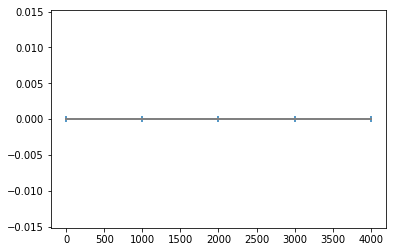

In [20]:
N.view.graph()

In [21]:
sec[0].add_channel_p(sn.channels.HeavysideCurrent(500,10,12),x = 0)

In [22]:
# sec[0].add_channel_c(sn.channels.Hodgkin_Huxley())
# sec[2].add_channel_c(sn.channels.Hodgkin_Huxley())

In [23]:
sec[0].add_channel_c(sn.channels.LeakChannel(0,2000))
sec[1].add_channel_c(sn.channels.LeakChannel(0,2000))
sec[2].add_channel_c(sn.channels.LeakChannel(0,2000))
sec[3].add_channel_c(sn.channels.LeakChannel(0,2000))

In [24]:
sec[0]

Section **139868588892848**
+ L: 1 mm
+ a: 1 um
+ C_m: 10 fF/μm²
+ R_l: 700 kΩ.μm
+ channels: LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)
+ point_channels: 0:<sinaps.channels.HeavysideCurrent object at 0x7f35b18f99b0>

In [25]:
sec[0].dx=1
sec[2].dx=1
sec[1].dx=1
sec[3].dx=1

In [26]:
sim=sn.Simulation(N,dx=0)

In [27]:
sim.N

Neuron(["0-1: Section(name=139868588892848, L=1 mm, a=1 um, C_m=1 uF/cm², R_l=70 Ω.cm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : ['0:<sinaps.channels.HeavysideCurrent object at 0x7f35b18ae630>'])", '1-2: Section(name=139868588893296, L=1 mm, a=1 um, C_m=100 uF/cm², R_l=70 Ω.cm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])', '2-3: Section(name=139868588895536, L=1 mm, a=1 um, C_m=1 uF/cm², R_l=70 Ω.cm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])', '3-4: Section(name=139868588895424, L=1 mm, a=1 um, C_m=100 uF/cm², R_l=70 Ω.cm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])'])

In [28]:
max_step=0.01 #dt ms
t_span =(0,40)
sim.run(t_span,max_step=max_step)

KeyboardInterrupt: 

In [ ]:
sim.V[3].loc[:,::10].plot()  ## sim.V (potential) [1] (section(1)) loc[time,space] start:end:step

In [ ]:
plt.imshow(sim.V.loc[::10,:].T)